In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
sns.set(style = 'whitegrid', color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0
1,0,7/1/2017,2.909700e+15,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0
2,0,7/1/2017,2.987400e+15,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0
4,0,7/1/2017,1.153490e+16,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0


In [4]:
data.describe()

,Purchased,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
count,992977.000000,9.929770e+05,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000
mean,0.025445,4.608987e+18,0.509052,0.139695,13.975567,0.366073,1436.925027,0.046510,0.106376
std,0.157472,2.661529e+18,0.499918,0.346671,23.037259,0.481730,3216.872703,0.210586,0.308319
min,0.000000,1.328640e+13,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.304610e+18,0.000000,0.000000,3.000000,0.000000,38.000000,0.000000,0.000000
50%,0.000000,4.607860e+18,1.000000,0.000000,7.000000,0.000000,237.000000,0.000000,0.000000
75%,0.000000,6.913870e+18,1.000000,0.000000,16.000000,1.000000,1071.000000,0.000000,0.000000
max,1.000000,9.223330e+18,1.000000,1.000000,1217.000000,1.000000,86896.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992977 entries, 0 to 992976
Data columns (total 18 columns):
Purchased               992977 non-null int64
VisitDate               992977 non-null object
UniqueVisitID           992977 non-null float64
VisitorGroup            992977 non-null object
PlatformUsed            992977 non-null object
VisitSource             992977 non-null object
BrowserName             992977 non-null object
OSName                  992977 non-null object
State                   408261 non-null object
Gender                  639596 non-null object
IncomeRange             383272 non-null object
ViewedProductInVisit    992977 non-null int64
ViewedSaleInVisit       992977 non-null int64
TotalPageViews          992977 non-null int64
PlacedSearch            992977 non-null int64
SecondsOnSite           992977 non-null int64
ClickedBanner           992977 non-null int64
AddedToBasket           992977 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usa

In [6]:
data.columns

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'VisitorGroup',
       'PlatformUsed', 'VisitSource', 'BrowserName', 'OSName', 'State',
       'Gender', 'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket'],
      dtype='object')

In [7]:
data = data.drop(['VisitDate', 'State'], axis = 1)

In [8]:
data.tail()

,Purchased,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
992972,0,9.203610e+18,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,1,0,8,0,993,0,0
992973,0,9.208420e+18,New Visitor,Web,WebSearch,Safari,iOS,NaN,NaN,0,1,3,0,254,0,0
992974,0,9.209280e+18,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,0,0,1,0,0,0,0
992975,0,9.213680e+18,Prior Visitor,Phone,WebSearch,Safari,iOS,Male,100to250k,1,0,24,1,2077,0,1
992976,0,9.219090e+18,Prior Visitor,Phone,ThirdPartyAds,Chrome,Android,Unknown,NaN,1,0,20,0,8730,0,0


In [9]:
# Drop rows where income data is not available
data_income = data.dropna(axis = 0, subset=['IncomeRange']) 

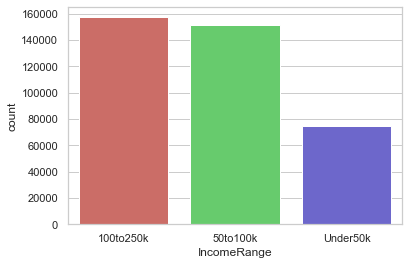

In [10]:
sns.countplot(x = 'IncomeRange', data = data_income, palette = 'hls')
# There are more high and med income people in the platform compared to low income people

In [11]:
# Divide data set into 3 groups
income_group = ['High_income', 'Med_income','Low_income']
High_income = data_income[data_income['IncomeRange'] == '100to250k'].drop(['IncomeRange'],axis = 1)
Med_income = data_income[data_income['IncomeRange'] == '50to100k'].drop(['IncomeRange'],axis = 1)
Low_income = data_income[data_income['IncomeRange'] == 'Under50k'].drop(['IncomeRange'],axis = 1)

In [12]:
#  Analyze price sensitivity of each data set

In [13]:
High_income.head()

,Purchased,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,Gender,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,Female,0,0,1,0,0,0,0
3,0,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,Female,1,1,8,1,430,0,0
12,0,4.360120e+16,Prior Visitor,Web,WebSearch,Safari,iOS,Female,1,0,26,1,2785,0,1
27,0,1.081290e+17,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Windows,Unknown,0,0,1,0,117,0,0
29,0,1.165150e+17,Prior Visitor with Purchase,Phone,WebSearch,Safari,iOS,Female,1,0,78,0,5813,0,0


In [14]:
# Create dummy variables  
def create_dummy_income(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
   
def logistic_model(df):    
    df = create_dummy_income(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only  
    print(summary)
    print(np.exp(clf.params))


In [15]:
logistic_model(High_income)

Index(['Purchased', 'UniqueVisitID', 'ViewedProductInVisit',
       'ViewedSaleInVisit', 'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
       'ClickedBanner', 'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')


/Users/tung491/workspace/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


         Current function value: 0.167324
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               110176
Model:                          Logit   Df Residuals:                   110175
Method:                           MLE   Df Model:                            0
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.3145
Time:                        11:33:17   Log-Likelihood:                -18435.
converged:                      False   LL-Null:                       -26893.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
UniqueVisitID                            -3.784e-20   4.99e-21     -7.581      0.000

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
logistic_model(Med_income)

Index(['Purchased', 'UniqueVisitID', 'ViewedProductInVisit',
       'ViewedSaleInVisit', 'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
       'ClickedBanner', 'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')


/Users/tung491/workspace/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Optimization terminated successfully.
         Current function value: 0.163000
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               105770
Model:                          Logit   Df Residuals:                   105769
Method:                           MLE   Df Model:                            0
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.3069
Time:                        11:33:18   Log-Likelihood:                -17240.
converged:                       True   LL-Null:                       -24875.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
UniqueVisitID                            -5.885

In [17]:
# With Med income people, the Clicked to Banner  is useful in explaining model
# Clicking rate increased the odd of purchase by 0.81 ( decrease)
# Among Med income people,gender does not matter
# Among Med income people, Web is useful in explaining whether you will purchase or not
# if you are using Web, the odd that you purchase is 1.2 higher compared to using phone 

In [18]:
logistic_model(Low_income)

Index(['Purchased', 'UniqueVisitID', 'ViewedProductInVisit',
       'ViewedSaleInVisit', 'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
       'ClickedBanner', 'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')


/Users/tung491/workspace/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


         Current function value: 0.166417
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52343
Model:                          Logit   Df Residuals:                    52342
Method:                           MLE   Df Model:                            0
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.2923
Time:                        11:33:19   Log-Likelihood:                -8710.8
converged:                      False   LL-Null:                       -12309.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
UniqueVisitID                            -6.327e-20   7.19e-21     -8.798      0.000

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
# With low income people, ViewedSaleinVisit, Seconds on Site, whether they use Web or not, Gender, any OS 
# are not useful in explaining whether they will purchase or not
# With low income people, the Clicked Banner rate increase the odd of purchase by 0.75 ( decrease)
# Among Low income people, if you are male, the odd that you purchase is 0.960 compared to women ( lower than women) 
# Among Low income people, if you are using Web, the odd that you purchase is 1.136 compared to using phone 

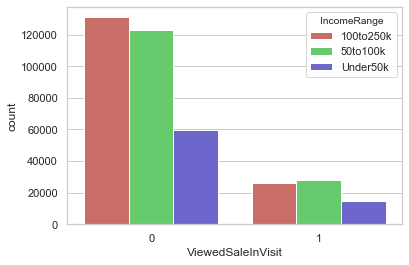

In [20]:
# Assume Viewed Sales meaning more interested in Sales
sns.countplot(x = 'ViewedSaleInVisit', data = data_income, hue = 'IncomeRange', palette = 'hls')

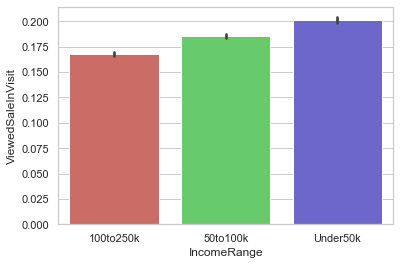

In [21]:
sns.barplot(x = 'IncomeRange', y = 'ViewedSaleInVisit', data = data_income, palette = 'hls')
# Low income people are more intested in Sales bc they have higher rate of viewing Sales 
#( high-income:16.5, Med income: 18.5, low income: 20%

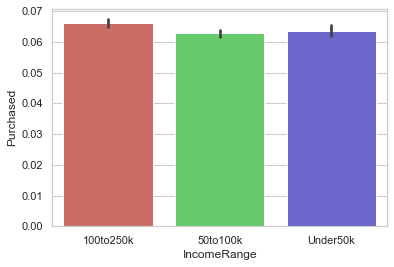

In [22]:
sns.barplot(x = 'IncomeRange', y = 'Purchased', data = data_income, palette = 'hls')


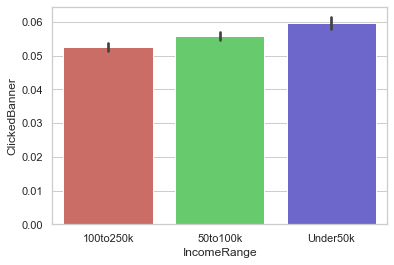

In [23]:
 sns.barplot(x = 'IncomeRange', y = 'ClickedBanner', data = data_income, palette = 'hls')
# Low income people are more likely to Click on the Banner (high-income:5.2%, Med income:5.5%, low income: 6% )
# This means the offer sales and using Banner will work better with low income people

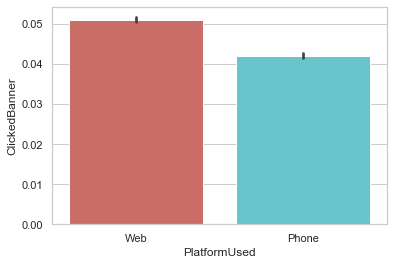

In [24]:
sns.barplot(x = 'PlatformUsed', y = 'ClickedBanner', data = data, palette = 'hls')
# People Click more when they are on the Web ( 5% Web vs. 4.1 % Phone)

In [25]:
#sns.barplot(x = 'PlatformUsed', y = 'AddedToBasket', data = data, palette = 'hls')
# Among all people, people Add to Basket almost at the same rate when they are on the phone and on the web, both 14.2 %

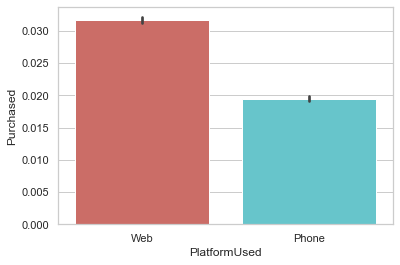

In [26]:
sns.barplot(x = 'PlatformUsed', y = 'Purchased', data = data, palette = 'hls')
# Among all people, people buy a lot more when they are on the Web( 3.2 %) compared to when they are on the phone (1.9%)
# same add to basket rate, but much lower purchase rate

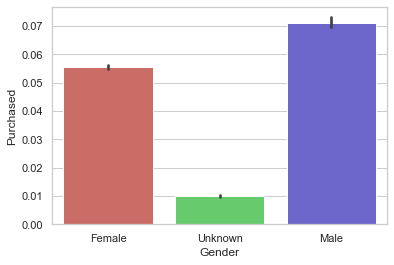

In [27]:
sns.barplot(x = 'Gender', y = 'Purchased', data = data, palette = 'hls')
# Among all, people purchase more when they are Male, 0.055 vs 0.07 ( 5.5% vs 7.1%)

In [28]:
data_income.columns

Index(['Purchased', 'UniqueVisitID', 'VisitorGroup', 'PlatformUsed',
       'VisitSource', 'BrowserName', 'OSName', 'Gender', 'IncomeRange',
       'ViewedProductInVisit', 'ViewedSaleInVisit', 'TotalPageViews',
       'PlacedSearch', 'SecondsOnSite', 'ClickedBanner', 'AddedToBasket'],
      dtype='object')

In [29]:
# Split data set into phone user and web user
phone_user = data[data['PlatformUsed'] == 'Phone']
web_user = data[data['PlatformUsed'] == 'Web']

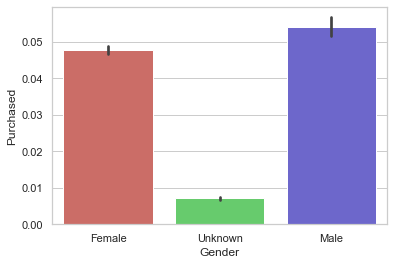

In [30]:
sns.barplot(x = 'Gender', y = 'Purchased', data = phone_user , palette = 'hls')
# Among all phone users, male purchase slightly more than women (0.054 vs. 0.047) or 5.4% vs 4.7%

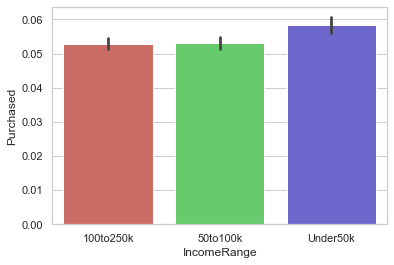

In [31]:
sns.barplot(x = 'IncomeRange', y = 'Purchased', data = phone_user , palette = 'hls')
# For phone user, low income people buy slightly a little more ( 5.8% compared to 5.2% of high or mid income)

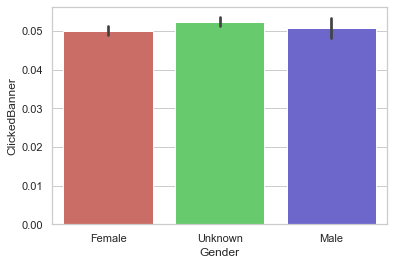

In [32]:
sns.barplot(x = 'Gender', y = 'ClickedBanner', data = phone_user , palette = 'hls')
# Among all phone users, male have the same click banner rate as women, 5%
# Male purchase more if they are using phone, they have the same rate of clicking like women on the banner.

In [33]:
#sns.barplot(x = 'Gender', y = 'ClickedBanner', data = web_user , palette = 'hls')
# Among all web users, women click to banner more( 6.1%) while men click on banner less 5.1%
# Male purchase more if they are using web, but they don't click Banner on the webas much as women.


In [34]:
# If you are Female, Clicked to Banner does explain whether you purchase or not.
# But clicked to Banner reduces the odd that you will purchase by 0.871 ( decrease)
# If you are female, if you are high income, the odd of you buying is 1.113 higher compared to mid income
# If you are female, if you are high income, the odd of you buying is 1.1 higher compared to low income


In [35]:
def create_dummy_all(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender','IncomeRange']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
   
def logistic_model_all(df):    
    df = create_dummy_all(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    # f test, This tests that each coefficient is jointly statistically significantly different from zero.
    A = np.identity(len(clf.params))
    A = A[1:,:]
    print(clf.f_test(A))
    #odd ratios only  
    print(summary)
    
    print(np.exp(clf.params))
    
logistic_model_all(data)

Index(['Purchased', 'UniqueVisitID', 'ViewedProductInVisit',
       'ViewedSaleInVisit', 'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
       'ClickedBanner', 'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown',
       'IncomeRange_50to100k', 'IncomeRange_Under50k'],
      dtype='object')


/Users/tung491/workspace/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Optimization terminated successfully.
         Current function value: 0.088626
         Iterations 9
<F test: F=array([[2690.07825757]]), p=0.0, df_denom=6.95e+05, df_num=24>
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               695083
Model:                          Logit   Df Residuals:                   695082
Method:                           MLE   Df Model:                            0
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.2527
Time:                        11:34:44   Log-Likelihood:                -61602.
converged:                       True   LL-Null:                       -82433.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [36]:
# Clicked Banner is  helpful in explaining the model
# decrease the odd of purchase by 0.88
# 